## Project Overview:

#### As a quality analyst working for a giant beverage company. The primary object here is to assess the production lines and keep them in check over the time to meet the industrial standards. The organisation keeps track of every move of the production lines for instance, the timings, quantity of beverages, etc. Recently you are tasked with checking if different production lines are pouring the right amount of beverages with proper carbonation in a predefined time. 

## Dataset Overview:

1. Id: Product Id (this is system generated while collecting sample)
2. Assembly line: There are 2 different assembly lines A and B used for production of beverages.
3. Quantity (lts.): The amount of beverage filled in the bottle.
4. CO2 dissolved: Amount of CO2 for carbonation in gms.
5. Time limit Crossed: If the time limit has crossed to process the bottle (fill & packaging).

### Let's Dive Into The Analysis:

In [59]:
## importing the dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
from scipy.stats import binom 
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Initial Data Loading And Overview:

In [2]:
## loading the dataset 
df = pd.read_csv(r"C:\Users\TANAY_MAHARANA\Documents\Projects\Statistics Projects\New Project\dataset\Quality Assessment - Quality Assesment.csv")
df.head()

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0


In [3]:
## getting the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  299 non-null    int64  
 1   Assembly Line       299 non-null    object 
 2   Quantity (lts.)     293 non-null    float64
 3   CO2 dissolved       299 non-null    float64
 4   Time limit Crossed  299 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB


In [4]:
## checking for missing values 
print(f"Column Wise Missing Values In the Data: \n{df.isnull().sum()}")

Column Wise Missing Values In the Data: 
Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64


In [5]:
## checking for duplicates 
print(f"The total number of duplicates in the dataset are: {df.duplicated().sum()}")

The total number of duplicates in the dataset are: 0


In [6]:
## checking the shape of the data 
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 299 rows and 5 columns


In [7]:
## checking the unique values in the dataset 
cols = []
val = []
for i in df.columns:
    cols.append(i)
    val.append(len(df[i].unique()))

unique = pd.DataFrame(zip(cols,val), columns=["Column Name", "#Unique Values"])
print(f"The count of unique values column-wise is:")
unique

The count of unique values column-wise is:


,Column Name,#Unique Values
0,Id,299
1,Assembly Line,4
2,Quantity (lts.),294
3,CO2 dissolved,299
4,Time limit Crossed,2


Observation:

- The Id column is unique across all the records and can be denoted as the primary key for this dataset

In [8]:
print(f"{df['CO2 dissolved'].max() - df['CO2 dissolved'].min():.2f}")

147.93


### Data Cleaning:

In [9]:
## Standardizing the Assembly Line column:
print("The values in the Assembly line column are:")
print(df["Assembly Line"].value_counts())

## Replacing "b" with "B" and "a" with "A"
def replace(column):
    for val in column:
        if val == "b":
            return "B"
        elif val == "a":
            return "A"
        else:
            return val

df["Assembly Line"] = df["Assembly Line"].apply(replace)

print("--"*30)
## Checking the correct values 
print("The Values after substituting are:")
print(df["Assembly Line"].value_counts())


The values in the Assembly line column are:
Assembly Line
B    156
A    135
b      4
a      4
Name: count, dtype: int64
------------------------------------------------------------
The Values after substituting are:
Assembly Line
B    160
A    139
Name: count, dtype: int64


In [10]:
## Removing any empty or incomplete rows:
print("Columns with empty values are: ")
print(df.isnull().sum())

## Removing the empty values in the "Quantity (lts.)" column with its mean 
df["Quantity (lts.)"].fillna(df["Quantity (lts.)"].mean(), inplace=True)

print("--"*30)
print("Columns after filling the null values:")
print(df.isnull().sum())


Columns with empty values are: 
Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64
------------------------------------------------------------
Columns after filling the null values:
Id                    0
Assembly Line         0
Quantity (lts.)       0
CO2 dissolved         0
Time limit Crossed    0
dtype: int64


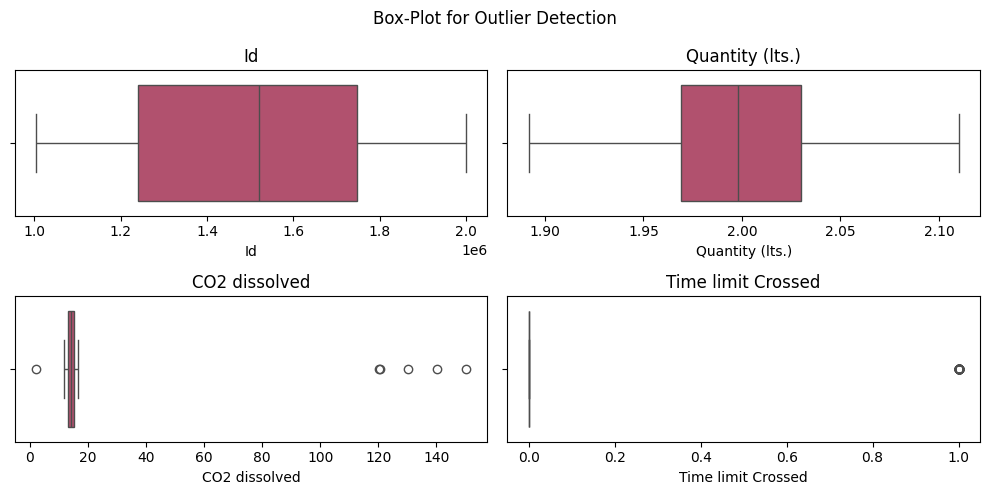

In [11]:
## Checking for outliers in the dataset 
int_cols = df.select_dtypes(["int", "float"])

plt.figure(figsize=(10,5))
for i, col in enumerate(int_cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x = df[col], palette="flare")
    plt.title(col)
    plt.tight_layout()
    plt.suptitle("Box-Plot for Outlier Detection")
plt.show()

Observation:

- During the datacleaning, following tasks were performed and insights generated:
    - The values of the column "Assembly Line" were standardized to "A" and "B", setting the cardinality to 2.
    - The column "Quantity" had missing values which were replaced by the mean of the "Quantity" column.
    - During checking the outliers from the dataset we can observe from the above graph that column "CO2 Dissolved" and
    "Time limit Crossed" have some outliers present, which needs to be investigated further.

## Part 1) Understanding the distributions and patterns within the data:

In [12]:
## Checking for the total number of times the time limit was crossed in the data
print(f"The total number of time time limit crossed to process the bootle is: {df['Time limit Crossed'].sum()}")

The total number of time time limit crossed to process the bootle is: 54


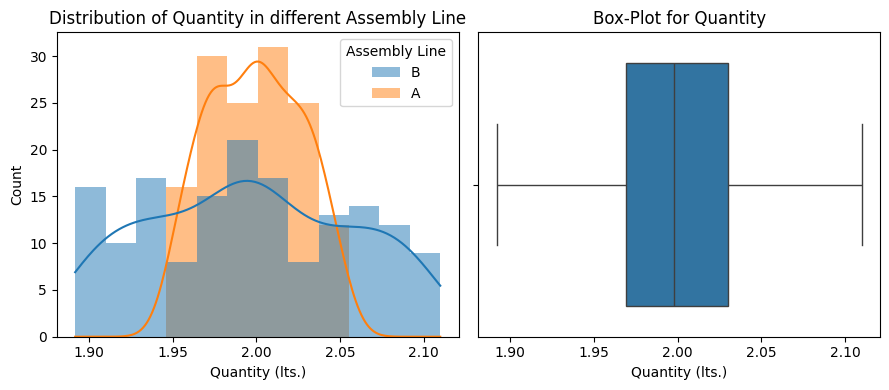

In [13]:
## Checking the distribution of the "Quantity (lts.)" Column
fig, axes = plt.subplots(1,2, figsize=(9,4))

sns.histplot(x = df["Quantity (lts.)"], kde=True, edgecolor=None, ax=axes[0], hue=df["Assembly Line"])
axes[0].set_title("Distribution of Quantity in different Assembly Line")

sns.boxplot(x = df["Quantity (lts.)"], ax=axes[1])
axes[1].set_title("Box-Plot for Quantity")

plt.tight_layout()
plt.show()

Observations:

- Witnessed approximately normal distribution within quantity.
- The normal distribtion is overshadowed due to presence of outliers in CO2 dissolved.
- On top of that, the extremes in carbonation values seems unreasonable and therefore would require a proper treatment in later stages.

In [14]:
## Checking for the probability of time limits crossed for different Assembly Lines
# grouping the data
table = df.groupby("Assembly Line").agg({"Time limit Crossed":["sum", "count"]}).reset_index()
# setting the column names 
table.columns = ["Assembly Line", "Total time limit crossed", "Total observation"]
# finding the probability 
table["Proportion"] = table["Total time limit crossed"] / table["Total observation"]
table

,Assembly Line,Total time limit crossed,Total observation,Proportion
0,A,20,139,0.143885
1,B,34,160,0.212500


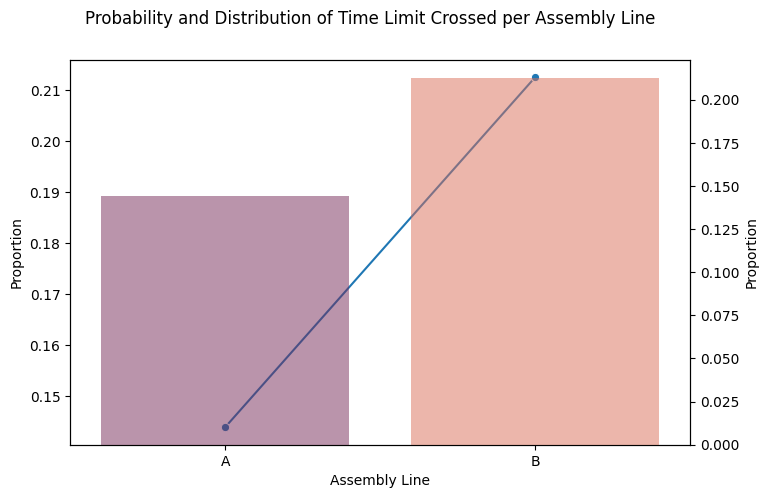

In [72]:
## Checking the distribution for the time limit crossed per assembly line
fig, axes1 = plt.subplots(figsize=(8,5))

sns.lineplot(data = table["Proportion"], ax=axes1, marker="o", sort=False)
axes2 = axes1.twinx()

assembly_order = ["A", "B"]
sns.barplot(x=table["Assembly Line"], y=table["Proportion"], errorbar=None, palette="rocket", ax=axes2, alpha=0.5, order=assembly_order)
axes1.set_xlabel("Assembly Line")

fig.suptitle("Probability and Distribution of Time Limit Crossed per Assembly Line")
plt.show()

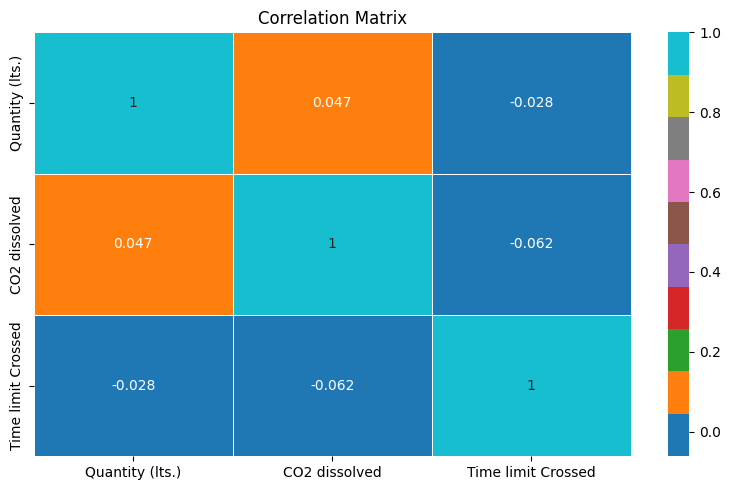

In [16]:
## correlation between the columns of the dataset 
plt.figure(figsize=(8,5))
# segregating the int columns
int_col = df.select_dtypes(["int", "float"])
# dropping the id column 
int_col.drop("Id", axis=1, inplace=True)
# plotting the correlation matrix
sns.heatmap(int_col.corr(), annot=True, linewidth=.5, cmap="tab10")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Observations:

- Almost all the correlation values are insignificant
- The correlation b/w CO2 dissolved and Quantity is very less in order to have a cause effect relation.

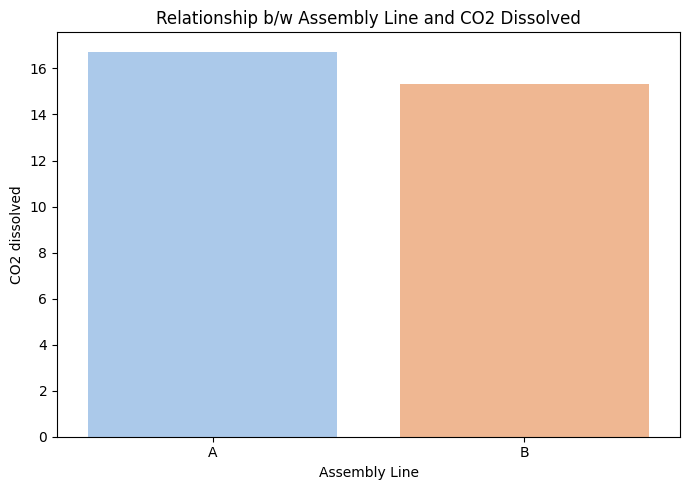

In [17]:
## bar plot defining the relationship between Assembly line and CO2 dissolved
plt.figure(figsize=(7,5))
sns.barplot(x=df["Assembly Line"], y=df["CO2 dissolved"], palette="pastel", errorbar=None, order=["A", "B"])
plt.title("Relationship b/w Assembly Line and CO2 Dissolved")
plt.tight_layout()
plt.show()


Establising analysis of time limit crossed with respect to quantity and CO2 dissolved:

In [18]:
## segregating the time limit crossed data 
limit_crossed = df[df["Time limit Crossed"]==1]
print("The average CO2 dissolved and Quantity, when the time limit was crossed:")
limit_crossed.pivot_table(index="Assembly Line", aggfunc={"Quantity (lts.)":"mean",
                                                          "CO2 dissolved":"mean"}).reset_index()

The average CO2 dissolved and Quantity, when the time limit was crossed:


,Assembly Line,CO2 dissolved,Quantity (lts.)
0,A,14.192708,2.002915
1,B,13.840489,1.990556


In [19]:
## segregating the within time data
within_limit = df[df["Time limit Crossed"]==0]
print("The average CO2 dissolved and Quantity, when the time limit was not crossed:")
within_limit.pivot_table(index="Assembly Line", aggfunc={"Quantity (lts.)":"mean",
                                                          "CO2 dissolved":"mean"}).reset_index()

The average CO2 dissolved and Quantity, when the time limit was not crossed:


,Assembly Line,CO2 dissolved,Quantity (lts.)
0,A,17.159994,1.998855
1,B,15.734264,1.998403


Assembly Line
B    34
A    20
Name: count, dtype: int64


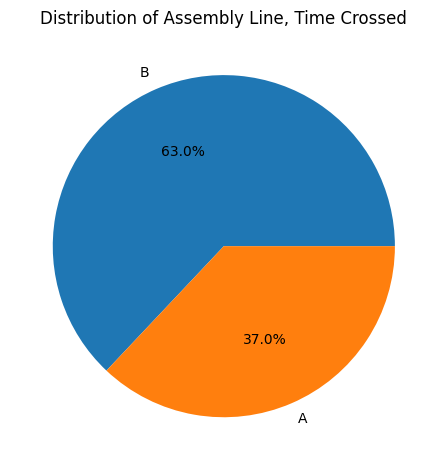

In [20]:
## Checking for the Assembly Line with most number of time limit crossed
print(limit_crossed["Assembly Line"].value_counts())
data = limit_crossed["Assembly Line"].value_counts()

plt.pie(data, labels=data.index, autopct="%1.1f%%")
plt.title("Distribution of Assembly Line, Time Crossed")
plt.tight_layout()
plt.show()

Observations:

- From the above two tables we can see that:
    - When the time limit was crossed, Assembly line A has slightly more average Quantity poured, which can be a driving factor for overall time taken
    - When the time limit was not crossed, the average Quantity poured is approx 1.99 lts in both the Assembly Lines.
- When the time limit is crossed, the proportion of assembly line B to assembly line A is 63.00% and 37.00% respectively.
- So, we can note that Assembly Line B needs a close notion as to why is it taking more time most times.

## Outlier Detection and Elemination:

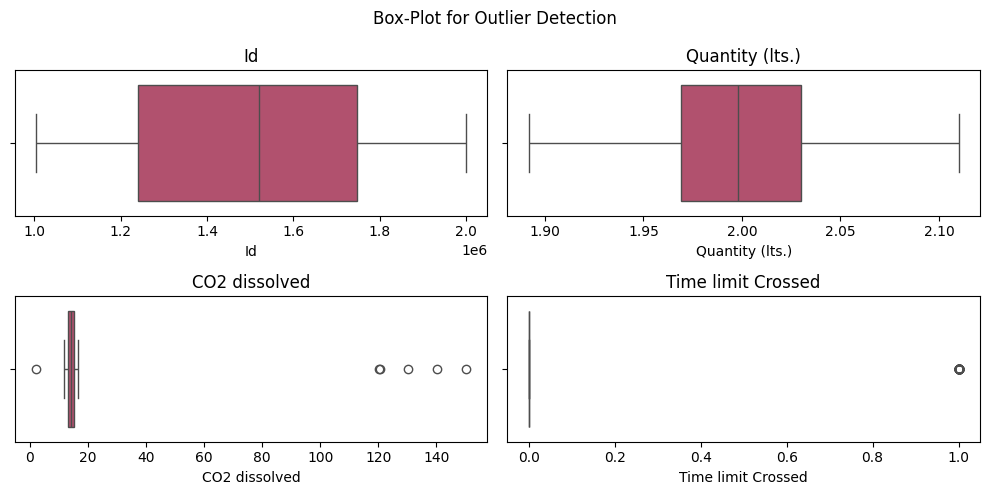

In [21]:
## checking for outliers in the dataset
int_cols = df.select_dtypes(["int", "float"])

plt.figure(figsize=(10,5))
for i, col in enumerate(int_cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x = df[col], palette="flare")
    plt.title(col)
    plt.tight_layout()
    plt.suptitle("Box-Plot for Outlier Detection")
plt.show()

In [22]:
## using the IQR Rule for Outlier Handling
q1 = df["CO2 dissolved"].quantile(.25)
q2 = df["CO2 dissolved"].quantile(.50)
q3 = df["CO2 dissolved"].quantile(.75)
q4 = df["CO2 dissolved"].max()

IQR = q3 - q1 

upper_whisker = q3 + 1.5 * IQR
lower_whisker = q1 - 1.5 * IQR

print(f"The lower cutoff for the CO2 dissolved column is: {lower_whisker:.2f}")
print(f"The upper cutoff for the CO2 dissolved column is: {upper_whisker:.2f}")

The lower cutoff for the CO2 dissolved column is: 10.06
The upper cutoff for the CO2 dissolved column is: 18.19


In [23]:
## removing the outliers
outliers = df[(df["CO2 dissolved"] > upper_whisker) | (df["CO2 dissolved"] < lower_whisker)]
df.drop(outliers.index, inplace=True)

## Checking the mean value sof the CO2 Dissolved column after outlier removal 
print(f"The mean of the CO2 Dissolved is: {df['CO2 dissolved'].mean():.2f}")

The mean of the CO2 Dissolved is: 14.05


### Part 3) Understanding probability distributions and interval estimates:

In [42]:
## building the pivot
pivot = df.pivot_table(index="Assembly Line", values="Time limit Crossed", aggfunc={"Time limit Crossed":["sum", "count"]}).reset_index()
## renaming the columns 
pivot.columns = ["Assembly Line", "Total Observation", "Time limit Crossed"]
## calculating the probability
pivot["Probability"] = pivot["Time limit Crossed"]/pivot["Total Observation"]
print("The probability of both the assembly lines crossing the time limit is: ")
pivot

The probability of both the assembly lines crossing the time limit is: 


,Assembly Line,Total Observation,Time limit Crossed,Probability
0,A,136,20,0.147059
1,B,157,34,0.216561


Considering the probabilities calculated in previous part,calculating the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B.

In [48]:
## using binomial distribution to calculate the probability
prob_B = pivot.loc[1, "Probability"]                              # probaility of Assembly line B
n = 50                                                            # sample size
k = 10                                                            # bottles crossing the time limit

pmf = binom.pmf(k, n, prob_B)
print(f"The probability that 10 bottles crossed the time limit out of 50, on assembly line B is: {pmf*100:.2f}%")

The probability that 10 bottles crossed the time limit out of 50, on assembly line B is: 13.42%


Calculating the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A.

In [62]:
## using binomial distribution to calculate the probability
prob_A = pivot.loc[0, "Probability"]                              # probaility of Assembly line B
n = 50                                                            # sample size
k = 10                                                            # bottles crossing the time limit

pmf = binom.pmf(k, n, prob_A)
print(f"The probability that 10 bottles crossed the time limit out of 50, on assembly line A is: {pmf*100:.2f}%")

The probability that 10 bottles crossed the time limit out of 50, on assembly line A is: 8.38%


Calculating the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B.

In [46]:
prob_B = pivot.loc[1, "Probability"]                              # probaility of Assembly line B
n = 50                                                            # sample size
k = 9                                                             # bottles crossing the time limit

pmf = 1 - binom.cdf(k, n, prob_B)
print(f"The probability that atleast 10bottles crossed the limit out of 50 sample bottles in assembly line B is: {pmf*100:.2f}%")

The probability that atleast 10bottles crossed the limit out of 50 sample bottles in assembly line B is: 66.60%


Calculating the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A.

In [54]:
prob_A = pivot.loc[0, "Probability"]                              # probaility of Assembly line B
n = 50                                                            # sample size
k = 9                                                             # bottles crossing the time limit

pmf = 1 - binom.cdf(k, n, prob_A)
print(f"The probability that atleast 10bottles crossed the limit out of 50 sample bottles in assembly line A is: {pmf*100:.2f}%")


The probability that atleast 10bottles crossed the limit out of 50 sample bottles in assembly line A is: 19.18%


Observations:

- From the dataset we can conclude that, during scenarios when time limit is crossed, the probabilities across assembly lines are:
    - Assembly Line "A" - 14.70%
    - Assembly Line "B" - 21.65%
- --
- The probability that 10 bottles crossed the time limit out of 50, on assembly line B is: 13.42%
- The probability that 10 bottles crossed the time limit out of 50, on assembly line A is: 8.38%
- --
- The probability that atleast 10 bottles crossed the limit out of 50 sample bottles in assembly line B is: 66.60%
- The probability that atleast 10 bottles crossed the limit out of 50 sample bottles in assembly line A is: 19.18%

Given:

 In 2 Litre soft drink bottles, the drink filled is close to normally distributed. If bottles contain less than 95% of the listed net content (around 1.90 litres), the manufacturer may be penalised by the state office of consumer affairs. Bottles that have a net quantity above 2.1 litres may cause excess spillage upon opening.

Calculating the probability that the bottle content can be either penalised or have spillage:

In [61]:
## using z-score method to calculate the probability
mean = df["Quantity (lts.)"].mean()
std_dev = df["Quantity (lts.)"].std()
# calculating z_scores
z_score_penalty = (1.9 - mean) / std_dev
z_score_spillage = (2.1 - mean) / std_dev
# calculating probabilities 
prob_penalty = stats.norm.cdf(z_score_penalty)
prob_spillage = stats.norm.cdf(z_score_spillage)
# total probability 
total_prob = round((prob_penalty + prob_spillage), 2)

print(f"The probability that the bottle content can either be penalised or have spillage is: {total_prob}%")

The probability that the bottle content can either be penalised or have spillage is: 1.0%


Calculating the probability that the bottle content is in between 1.95 litres and 2.05 litres

In [64]:
mean = df["Quantity (lts.)"].mean()
std_dev = df["Quantity (lts.)"].std()
# given the scenario
lower_bound = 1.95
upper_bound = 2.05
# calculating z_scores
z_score_lower = (lower_bound - mean) / std_dev
z_score_upper = (upper_bound - mean) / std_dev 
# calculating the probabilities
prob_lower = stats.norm.cdf(z_score_lower)
prob_upper = stats.norm.cdf(z_score_upper)

print(f"The probability that the bottle content is in between 1.95 lts and 2.05 lts is: {(prob_upper - prob_lower)*100:.2f}%")

The probability that the bottle content is in between 1.95 lts and 2.05 lts is: 69.97%


Calculating the 90% interval estimate for the Quantity variable

In [70]:
mean = df['Quantity (lts.)'].mean()
std_dev = df['Quantity (lts.)'].std()
num_samples = df['Quantity (lts.)'].count()
# calculate standard error
std_err = std_dev / np.sqrt(num_samples)
# calculate 90% confidence interval
lower, upper = stats.norm.interval(0.90, loc=mean, scale=std_err)
print(f"The 90% interval estimate for the Quantity variable is: {lower, upper}")

The 90% interval estimate for the Quantity variable is: (1.9934834153335375, 2.0027533551312318)


Observations:

- The probability that the bottle content can either be penalised or have spillage is: 1.0%
- The probability that the bottle content is in between 1.95 lts and 2.05 lts is: 69.97%
- The 90% interval estimate for the Quantity variable is: (1.99, 2.00) lts

## Insights:

#### 1. Higher Processing Time: In our analysis, we have witnessed that assembly line B has higher chances of introducing latency in filling the bottles as compared to assembly line A. This definitely has a negative impact on our overall production as it slows down the production rate and therefore can affect the final shipment.

#### The recommendation over here is to investigate the root cause asap. This may include fixing or upgrading the components involved in the production line, updating the softwares involved, etc. 
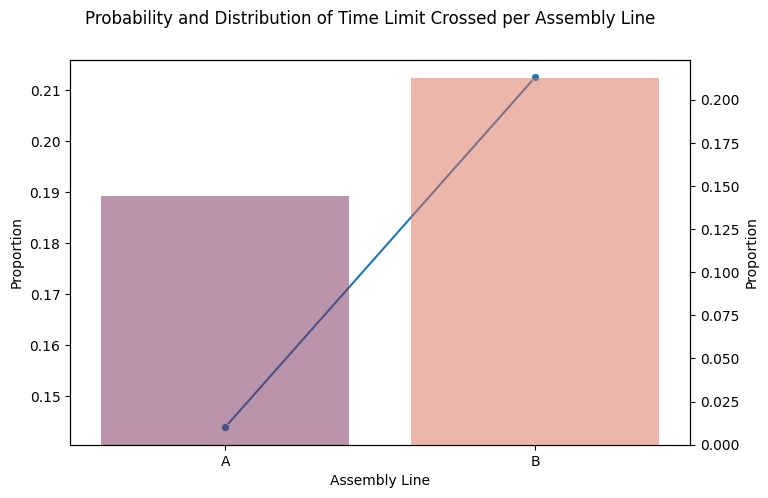

#### 2. Higher Carbonation: In our analysis, we have encountered certain problems with CO2 dissolved or carbonation analysis. If you conduct further analysis on this variable as suggested in challenges, you will find that the carbonation values are very high (>15 gms per litre). Furthermore, there are 24.85% chances of getting high carbonation which may lead to higher spillage upon opening the bottle.

#### This issue needs to be addressed immediately. Understand that it could be a data issue as well since there were outliers registered in CO2 dissolved and therefore, we may need to collect other samples to conclude things later on.
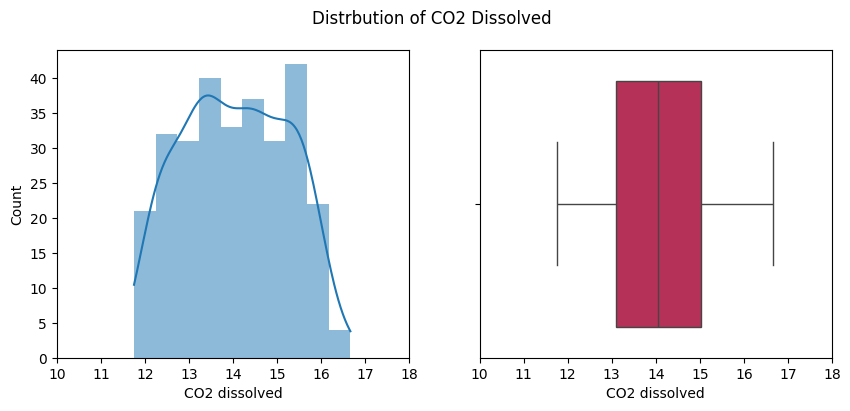